In [1]:
# Load dataframes from data_clean.ipynb

%store -r ev_sales_nation_df
%store -r electric_vehicle_df
%store -r charging_stations_df
%store -r income_df

In [20]:
import geopandas as gpd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
from sklearn import metrics

## Question 3
### Is there a correlation between types of electric vehicles purchased in Washington state and geographic location? Identify several groups that would make a good target for a potential marketing campaign.

Plan:
Select features to be used for cluster and classification models (i.e. year, make, EV type, income)
Convert features to numeric or categorical depending on clustering/classification method
Create several models to identify and visualize market segments 

In [3]:
charging_stations_df.head()

,City,ZIP,EV Network,EV Connector Types,EV Workplace Charging
0,Lacey,98503,Non-Networked,J1772,False
1,Seattle,98188,Non-Networked,NEMA520,False
2,Spokane,99252,Non-Networked,J1772 NEMA520,False
3,Spokane,99201,Non-Networked,J1772,False
4,Bellevue,98004,ChargePoint Network,J1772,False


In [4]:
income_df

Year,Adams,Asotin,Benton,Chelan,Clallam,Clark,Columbia,Cowlitz,Douglas,Ferry,...,Skamania,Snohomish,Spokane,Stevens,Thurston,Wahkiakum,Walla Walla,Whatcom,Whitman,Yakima
1989,24604.0,22897.0,32593.0,24312.0,25434.0,31800.0,22418.0,27866.0,27054.0,25170.0,...,28778.0,36847.0,25769.0,24440.0,30976.0,26969.0,24414.0,28367.0,21674.0,23612.0
1990,28024.0,24206.0,35012.0,25833.0,27329.0,33734.0,24478.0,29746.0,28708.0,27355.0,...,31368.0,38820.0,27337.0,25609.0,33139.0,28590.0,25808.0,31097.0,22949.0,25484.0
1991,27301.0,25110.0,37093.0,27592.0,27861.0,34250.0,24123.0,31038.0,29407.0,27236.0,...,31000.0,39868.0,28355.0,26482.0,34851.0,28459.0,26242.0,31953.0,23735.0,25866.0
1992,28328.0,26251.0,39228.0,28746.0,28578.0,35847.0,26136.0,31195.0,30932.0,27841.0,...,31833.0,41670.0,29570.0,27519.0,36676.0,29655.0,27647.0,32599.0,24389.0,27085.0
1993,31277.0,27359.0,41153.0,30148.0,29340.0,37418.0,28123.0,31957.0,31855.0,27829.0,...,32283.0,42418.0,30482.0,28818.0,37766.0,31076.0,28902.0,32958.0,25162.0,28079.0
1994,29537.0,27873.0,42790.0,31547.0,29951.0,38828.0,26779.0,33309.0,32688.0,29587.0,...,33401.0,43741.0,31631.0,29854.0,38939.0,31298.0,30152.0,34031.0,25134.0,29164.0
1995,29604.0,28288.0,42540.0,32164.0,31163.0,40525.0,29861.0,34191.0,32930.0,28910.0,...,33364.0,44994.0,32256.0,29783.0,39971.0,32688.0,31014.0,34893.0,26270.0,29717.0
1996,31806.0,29813.0,42817.0,33918.0,32559.0,43044.0,33041.0,35516.0,35420.0,30091.0,...,36619.0,47416.0,33517.0,30759.0,41497.0,34014.0,32957.0,36492.0,27838.0,31442.0
1997,31795.0,31499.0,44057.0,35662.0,34770.0,45705.0,30820.0,36738.0,36855.0,30489.0,...,37409.0,50680.0,34920.0,32435.0,43748.0,36566.0,34094.0,37553.0,28697.0,32946.0
1998,34073.0,32477.0,45665.0,37175.0,36012.0,47252.0,33060.0,38437.0,37733.0,30412.0,...,38194.0,52342.0,36389.0,33851.0,45843.0,38626.0,35688.0,39188.0,29174.0,34649.0


In [5]:
electric_vehicle_df['Vehicle Location'] = electric_vehicle_df['Vehicle Location'].replace({"POINT \(": ""},regex=True)
electric_vehicle_df['Vehicle Location'] = electric_vehicle_df['Vehicle Location'].replace({"\)": ""},regex=True)
electric_vehicle_df[['long','lat']] = electric_vehicle_df['Vehicle Location'].str.split(" ",expand=True)
#electric_vehicle_df.drop(columns=["Vehicle Location"], inplace=True)
electric_vehicle_df['long'] = electric_vehicle_df['long'].astype('float')
electric_vehicle_df['lat'] = electric_vehicle_df['lat'].astype('float')


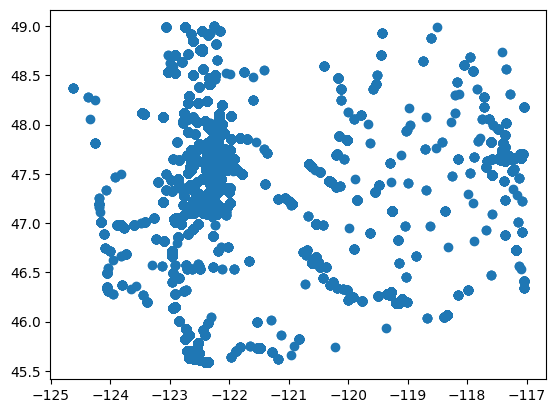

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=electric_vehicle_df['long'], y=electric_vehicle_df['lat'])
plt.show()

In [7]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries
#countries[countries["name"] == "United States of America"].plot(color="lightgrey")

C:\Users\mike\AppData\Local\Temp\ipykernel_29980\682223864.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<Axes: >

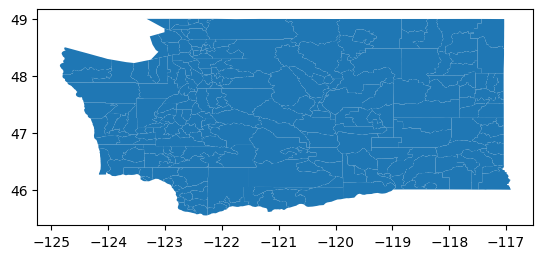

In [8]:
usa = gpd.read_file('data/states.shp')
wash = gpd.read_file('data/tl_2016_53_cousub.shp')
wash.plot()


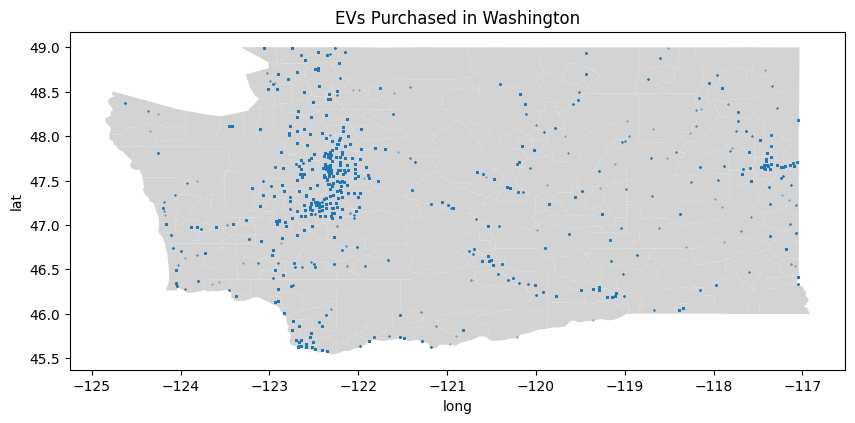

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
wash.plot(color="lightgrey", ax=ax)
electric_vehicle_df.plot(x='long', y='lat', kind="scatter", 
        title="EVs Purchased in Washington",
        s=.1,
        ax=ax)
plt.show();

C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

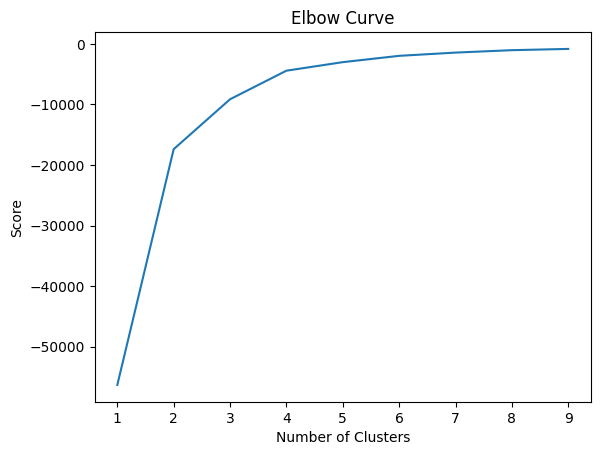

In [10]:
electric_vehicle_df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = electric_vehicle_df[['lat']]
X_axis = electric_vehicle_df[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in 
         range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mike\AppData\Local\Temp\ipykernel_29980\2587727838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = kmeans.labels_
C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mike\AppData\Lo

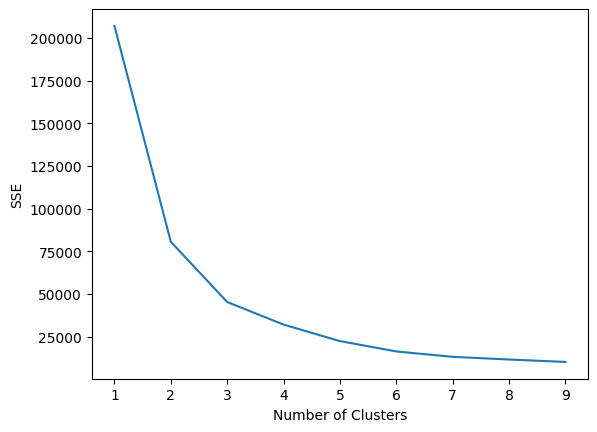

In [11]:
X = electric_vehicle_df[['lat', 'long']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    #print(X["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(electric_vehicle_df[electric_vehicle_df.columns[10:12]]) # Compute k-means clustering
electric_vehicle_df['cluster_label'] = kmeans.fit_predict(electric_vehicle_df[electric_vehicle_df.columns[10:12]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(electric_vehicle_df[electric_vehicle_df.columns[10:12]]) # Labels of each point
electric_vehicle_df.head(10)

C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility,long,lat,cluster_label
0,King,Seattle,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),CAFV Eligible,-122.34301 47.659185,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.343010,47.659185,0
1,King,Bothell,98011,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible (Low battery range),-122.20578 47.762405,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.205780,47.762405,0
2,Yakima,Yakima,98908,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible (Low battery range),-120.6027202 46.5965625,PACIFICORP,-120.602720,46.596562,1
3,King,Kirkland,98034,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),CAFV Eligible,-122.209285 47.71124,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.209285,47.711240,0
4,Thurston,Olympia,98501,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),CAFV Eligible,-122.89692 47.043535,PUGET SOUND ENERGY INC,-122.896920,47.043535,0
5,Snohomish,Marysville,98271,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),CAFV Eligible,-122.1713847 48.10433,PUGET SOUND ENERGY INC,-122.171385,48.104330,0
6,King,Kent,98042,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),CAFV Eligible,-122.111625 47.36078,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.111625,47.360780,0
7,King,Woodinville,98072,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),CAFV Eligible,-122.151665 47.75855,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.151665,47.758550,0
8,Island,Coupeville,98239,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),CAFV Eligible,-122.6880708 48.2179983,PUGET SOUND ENERGY INC,-122.688071,48.217998,0
9,King,Bellevue,98004,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Unknown (Range not researched),-122.201905 47.61385,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.201905,47.613850,0


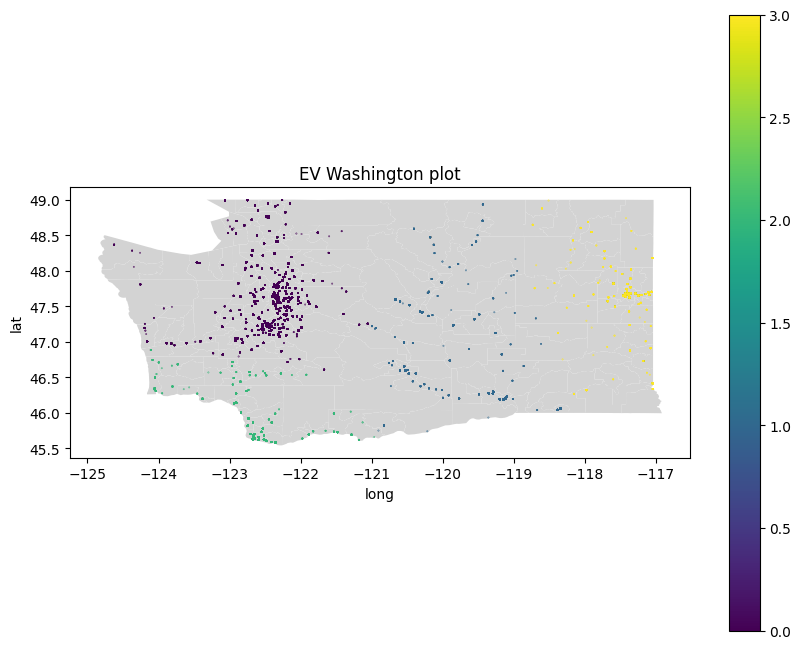

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
wash.plot(color="lightgrey", ax=ax)
electric_vehicle_df.plot(x='long', y='lat', kind="scatter", 
        title="EV Washington plot",
        s=.1,
        c=labels,
        cmap='viridis',
        ax=ax)
plt.show();

In [14]:
electric_vehicle_df.head()


,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility,long,lat,cluster_label
0,King,Seattle,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),CAFV Eligible,-122.34301 47.659185,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.343010,47.659185,0
1,King,Bothell,98011,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible (Low battery range),-122.20578 47.762405,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.205780,47.762405,0
2,Yakima,Yakima,98908,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible (Low battery range),-120.6027202 46.5965625,PACIFICORP,-120.602720,46.596562,1
3,King,Kirkland,98034,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),CAFV Eligible,-122.209285 47.71124,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.209285,47.711240,0
4,Thurston,Olympia,98501,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),CAFV Eligible,-122.89692 47.043535,PUGET SOUND ENERGY INC,-122.896920,47.043535,0


In [15]:
X = electric_vehicle_df[['lat', 'long']]


In [22]:
clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

#labels_050 = cluster_optics_dbscan(
#    reachability=clust.reachability_,
#    core_distances=clust.core_distances_,
#    ordering=clust.ordering_,
#    eps=0.5,
#)
#labels_200 = cluster_optics_dbscan(
#    reachability=clust.reachability_,
#    core_distances=clust.core_distances_,
#    ordering=clust.ordering_,
#    eps=2,
#)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
#colors = ["g.", "r.", "b.", "c."]
#for klass, color in zip(range(0, 4), colors):
#    Xk = X[labels_050 == klass]
#    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
#ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
#ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
#colors = ["g.", "m.", "y.", "c."]
#for klass, color in zip(range(0, 4), colors):
#    Xk = X[labels_200 == klass]
#    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
#ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
#ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

C:\Users\mike\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


NameError: name 'gridspec' is not defined

<Figure size 1000x700 with 0 Axes>

In [16]:

db = DBSCAN(eps=4, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

MemoryError: 

In [ ]:
electric_vehicle_df.lat.max()-electric_vehicle_df.lat.min()
electric_vehicle_df.long.max()-electric_vehicle_df.long.min()


7.580865000000003

● Describe all the steps performed for data modelling.

● Discuss the performance measure(s) used to determine the goodness of fit for the
proposed model.

● Do you suspect your initial effort (model) suffers overfitting? If so, discuss what steps
you took to overcome overfitting.

● Discuss your findings or inferences
